# MTpy Example 04

## Plot MT Response
We have plotted the station coverage, now lets have a look at some of the data.  We will plot apparent resistivity, impedance phase, induction vectors (if present), and phase tensor ellipses.  

 - **Apparent Resistivity ($\rho_a$)**: the volumetric average subsurface resistivity dictated by the period ($T$).  In a 1D Earth, this would be a hemisphere with a radius of the skin depth.   Because MT is a diffusive method, the apparent resistivity curve should vary smoothly as a function of period.
   - **Skin Depth**: ~500 $\sqrt(\rho_a \cdot T)$ (meters).  This indicates that the depth of investigation increases with period.  So in the plots the left side is small periods (shallow) and the right side is longer periods (deeper).
 - **Impedance Phase**: the phase response of the Earth.  In a 1D earth the impedance phase is 45$^\circ$ because in the frequency domain the amplitude and phase of the impinging magnetic field at a given period measured at the surface is similar to the Earth's electrical response.  In a non-1D earth, if the subsurface becomes more conductive the phase increases as the electric field gets attenuated. Conversely, if the subsurface becomes more resistive the phase decreases. 
 - **Induction Vectors**: Induction vectors relate how impinging horizontal magnetic fields relate to induced vertical magnetic fields in the Earth.  Vertical magnetic fields are induced from horizontal electrical currents, commonly along boundaries.  Also called tippers because the horizontal magnetic field gets tipped by the vertical magnetic field.  These are plotted as real and imaginary arrows. Real arrows point towards good conductors (the correct way), and imaginary arrows indicate dimensionality.  The imaginary arrows should be anti-parallel to the real arrows in a 2D subsurface.  When they stray this indicates 3D effects pointing towards the potential 3D source.
 - **Phase Tensor Elleipse**: The phase tensor is another representation of the impedance tensor with the added benefit of being invariant to static distortion.  Basically, the phase tensor is the ratio of the imaginary part of the impedance tensor to the real part.  The most common method to plot the phase tensor is an ellipse where the axes represent the mininum and maximum phase invariants and the orientation represents geoelectric strike.  The shape indicates dimensionality, where a circle represents a 1D subsurface because the minimum and maximum are the same.  In a 2D earth the ellipses will elongate in the direction of preferred electrical current flow.  To identify a 3D subsurface the invariant skew can be plotted as the ellipse face color.  The skew indicates how electrical currents are deflected by a 3D conductor.  A common threshold is between 3-6 degrees, where a skew angle above this is assumed to indicate 3D effects.    

In [69]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib inline

### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting. First, we will make an `MTData` object.

In [70]:
mc = MTCollection()
mc.open_collection(Path().cwd().joinpath("yellowstone_mt_collection.h5"))

### Plot Single Station

To plot a single station you just need to know the `tf_id` and `survey` if there are multiple same named stations.  Here lets plot a broadband station "YNP31B". 

Here we will plot the 2 orthogonal modes "xy" and "yx", remember "x" is north and "y" is east.  

#### Observations

 - **Apparent Resistivity**: On the left are short periods (shallow depths) and the two modes match each other, indicating a 1D subsurface.  This is common in basins or on top of plutonic or volcanic rocks.  At about 0.1 seconds the modes split indicating at least a 2D subsurface where the "xy" mode is more conductive than the "yx" mode.  The resistivity values are on the higher end above 100 but not extremely resistive < 1000 Ohm-m. From the skin depth equation we are looking at from about 300 meters to 100 km. We will show another plot to get a better indication of depth of investigation. 
 - **Impedance Phase**: Similar to the apparent resistivity and indicates the largest change is abound 0.1 seconds.  Note that the phase predicts when apparent resistivity changes.  
 - **Induction Vectors**: These are plotted in map view, therefore up is North and to the right is East.  The black arrows point towards good conductors, which we will see in later plots is to the south of this station in the shallower subsurface and to the north in the deeper subsurface.  The imaginary arrows (cyan) indicated dimensionality, suggesting a complex subsurface. In a 2D subsurface, the real arrows should point perpendicular to the orientation of the phase tensor ellipses.  
 - **Phase Tensor Ellipses**: The phase tensor ellipse are also plotted in map view with North up and East to the right.  They are circular at short periods, elongate in that same 0.1 to 10 second range and become more circular at depth.  The coloring here is the minimum phase invariant, which is a modest estimation of phase gradient indicating whether the subsurface is becoming more resistive (blues) or more conductive (reds).  Matching the apparent resistivity the ellipses become more blue in the 0.1 to 10 second period range and more red at depth.  

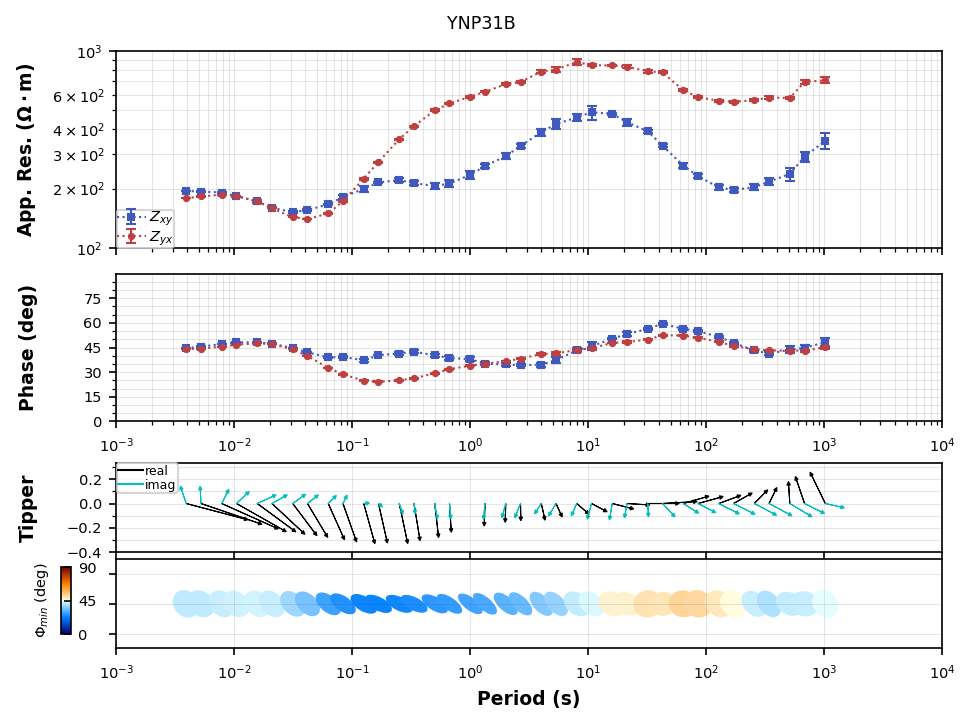

In [71]:
plot_ynp31 = mc.plot_mt_response("YNP31B", survey="YSBB")

### Plot Phase Tensor Skew

We can color the phase tensors by skew angle to get a better indication of dimensionality.  As you can see the between 0.1 to 1 second the skew is nearly 0 indicating a 2D subsurface.  At depth the skew angle becomes larger. 

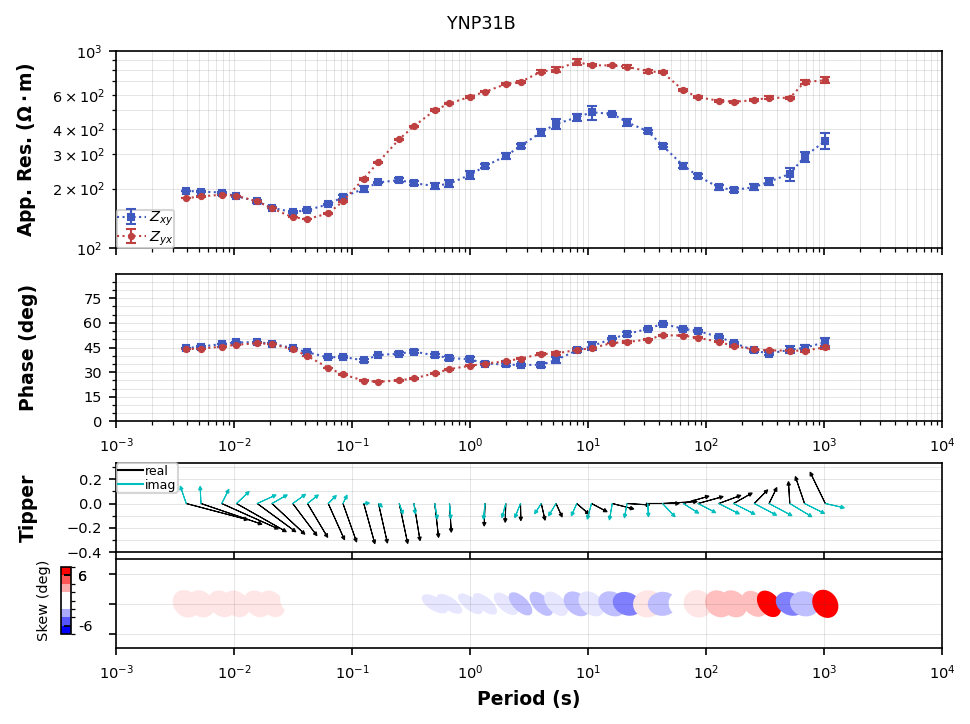

In [72]:
plot_ynp31.ellipse_colorby = "skew"
plot_ynp31.ellipse_range = (-6, 6, 2)
plot_ynp31.ellipse_cmap = "mt_seg_bl2wh2rd"
plot_ynp31.fig_num = 2
plot_ynp31.plot()

### Plot All Modes

It can be informative to plot all the modes of the impedance tensor.  The "xx" and "yy" modes should be small relative the "xy" and "yx" modes in a 1D and 2D subsurface but can be larger in a 3D subsurface.  As you can see at larger periods the "xx" and "yy" components are comprable to the "xy" and "yx" components.  

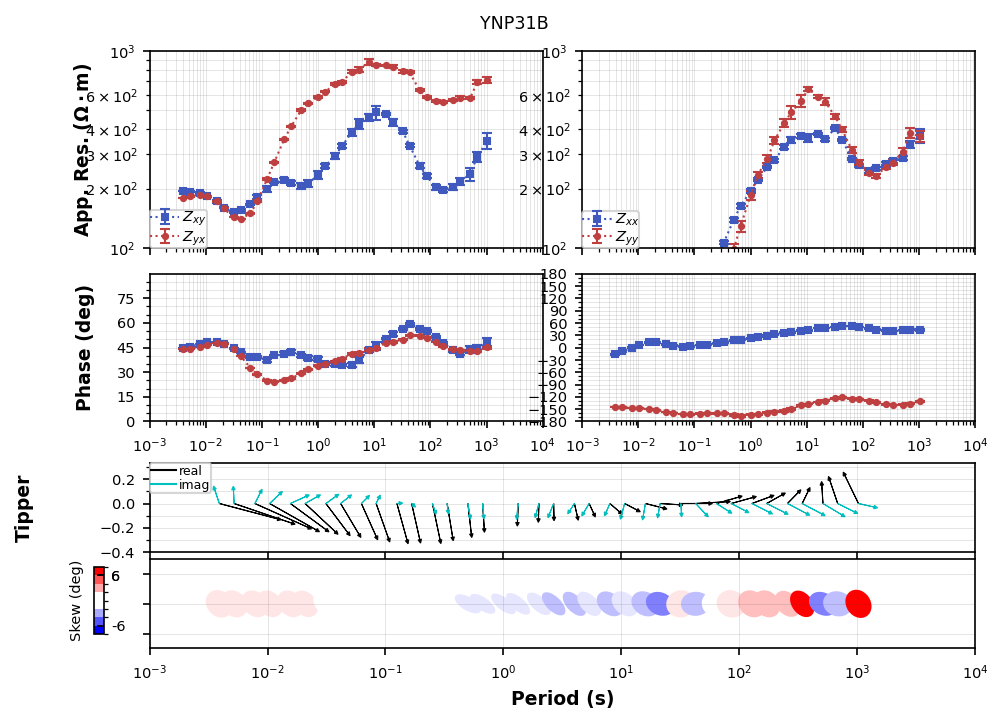

In [73]:
plot_ynp31.plot_num = 2
plot_ynp31.fig_num = 3
plot_ynp31.plot()

### Plot the Determinant

The determinant of the impedance tensor can provide some insight into the general subsurface structure.

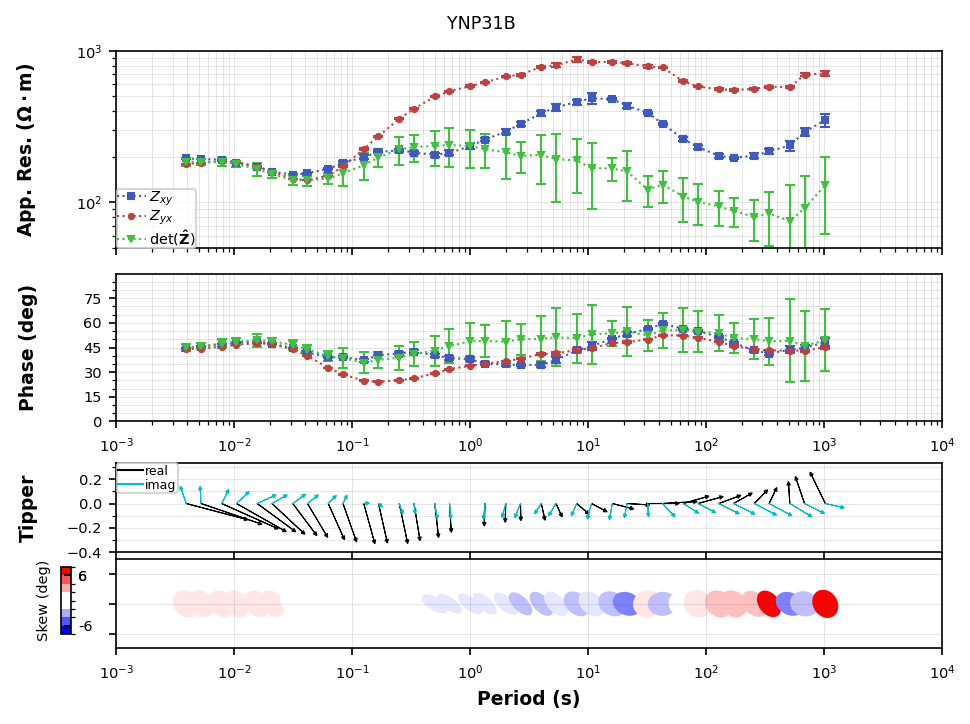

In [74]:
plot_ynp31.plot_num = 3
plot_ynp31.fig_num = 4
plot_ynp31.res_limits = (50, 1000)
plot_ynp31.plot()

## Plot Phase Tensor Element

Another method of plotting is to plot the invariants and properties of the phase tensor.  

 - **$\phi_{min}$**: an invariant of the phase tensor that represents the minimum phase change as a function of period. Again 45 degrees indicates a 1D subsurface, an increase indicates a conductive change with depth and a decrease indicates a resistive change with depth. 
 - **$\phi_{max}$**: an invariant of the phase tensor that represents the maximum phase change as a function of period.
 - **Skew**: an invariant of the phase tensor that indicates the deflection of electrical currents caused by 3D conductive bodies.  A common threshold is between 3-6 degrees, anything above or below 6 degrees indicates 3D effects. The sign is important as it indicates the direction of deflection with positive being clockwise and negative being counterclockwise.  
 - **Ellipticity**: a property of the phase tensor that defines how elliptical the phase tensor is.  Anything above 0.1 is indicative of 2D and possibly 3D effects
 - **Azimuth**: is a variant of the phase tensor (rotation dependent) and is an indicator of geoelectrical strike direction where 0 is North and 90 is east.  Here we see a prominant strike angle of around -50 or N310E.


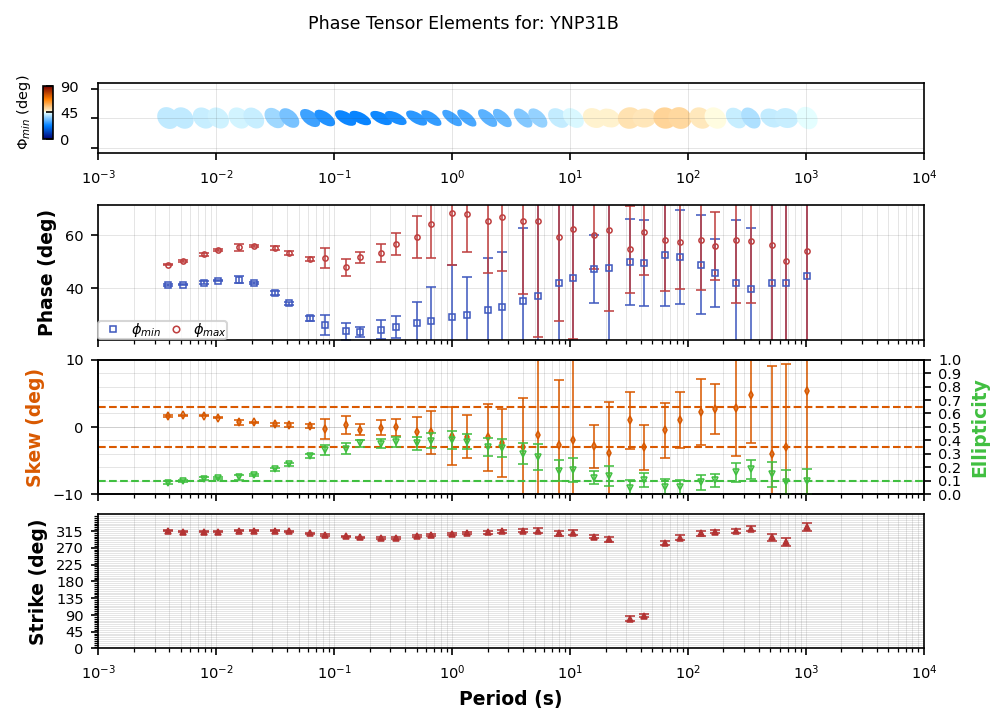

In [75]:
plot_pt = mc.plot_phase_tensor("YNP31B", survey="YSBB")

## Data Rotation

Sometimes it is helpful to rotate the data to a particular profile line, strike direction, or geographic coordinate system. From the above plot it looks like a general strike direction of N315E.  So if we rotate the data by N315E degrees we should get a strike angle of around 0 and the data will be in geoelectrical coordinates.

Now the phase tensors and ellipses are in geoelectrical coordinates so up is N315E and to the right is N0E.  

In [76]:
# this is a fix to a bug for now.
angle = 315
plot_ynp31.Z.rotate(angle, inplace=True)
plot_ynp31.Tipper.rotate(angle, inplace=True)
plot_ynp31.pt = plot_ynp31.Z.phase_tensor
plot_ynp31.rotation_angle += angle

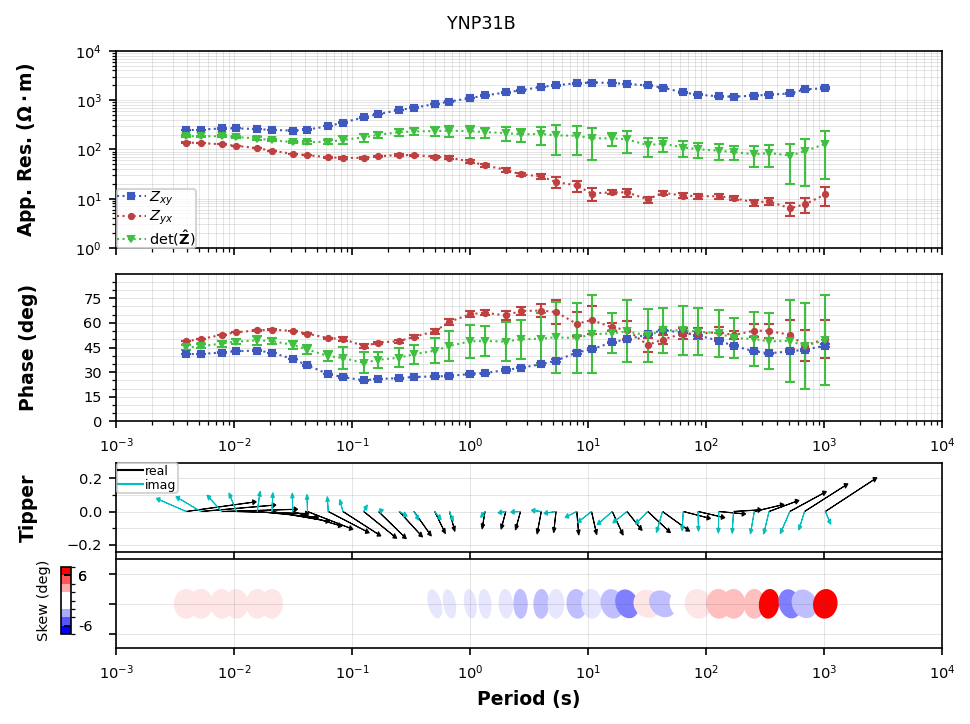

In [77]:
#plot_ynp31.rotation_angle = 315
plot_ynp31.fig_num = 5
plot_ynp31.res_limits = (1, 10000)
plot_ynp31.plot()

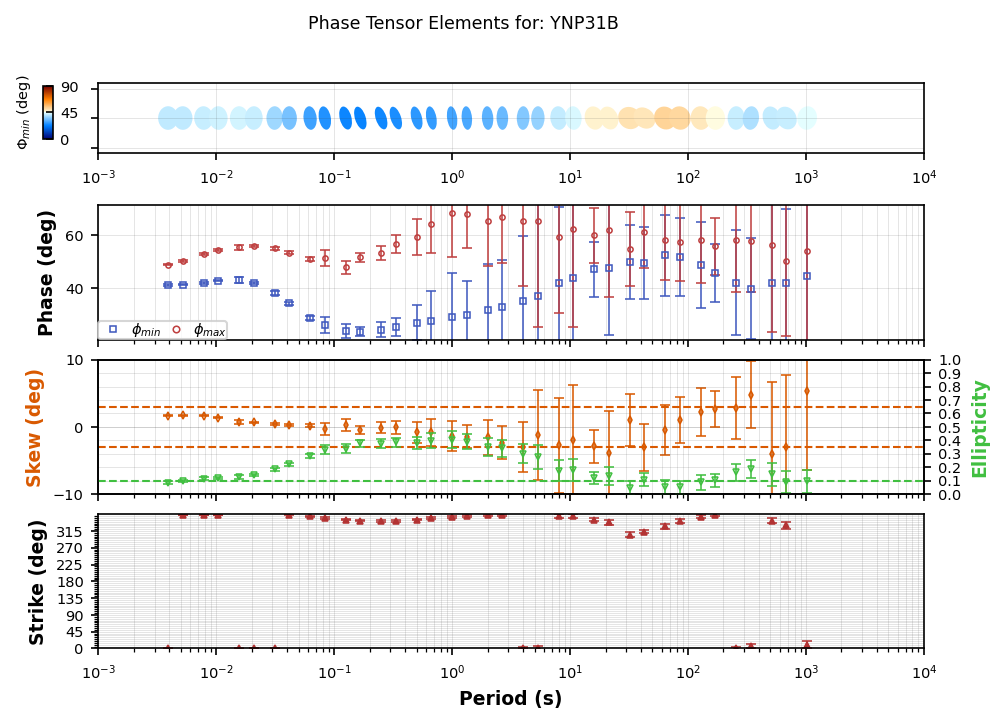

In [78]:
# this is a bug fix for now.  Be sure to run the rotation on plot_ynp31 in the above cell first.
plot_pt.pt = plot_ynp31.pt
plot_pt.fig_num = 8
plot_pt.plot()

## Plot Multiple Responses

It can be convenient to plot mutliple stations on top of each other.  Lets plot a long period station with this broadband station "WYYS2".  The first thing to notice is the large static shift between the 2 measurements.  This could be caused by the time of year the data were collected. Otherwise the phase and induction vectors match up well. 

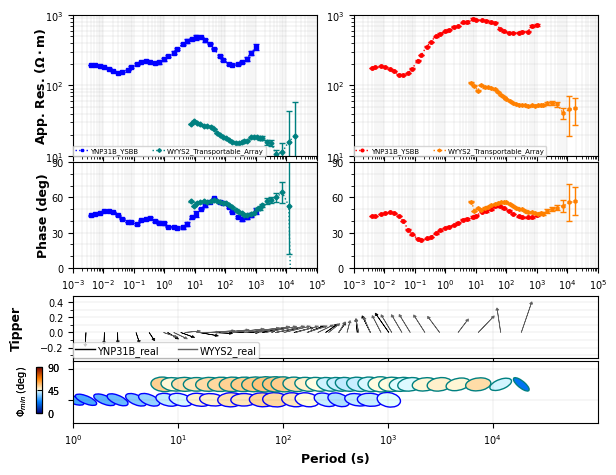

In [79]:
plot_multiple = mc.plot_mt_response(
    [["YNP31B", "YSBB"], ["WYYS2", "Transportable_Array"]], 
    plot_style="compare",
    plot_tipper="yr", 
    plot_pt=True,
    phase_limits=(0, 90)
) 

## Close Collection

Remember it is important to close the collection when we are done so there are no open instances of the H5 file.

In [80]:
mc.close_collection()

24:10:17T15:51:13 | INFO | line:777 |mth5.mth5 | close_mth5 | Flushing and closing /home/jovyan/earthscope-mt-course/notebooks/mtpy/yellowstone_mt_collection.h5
